In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df['churn'] = df['churn'].astype('int')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [6]:
df.shape

(200, 10)

In [7]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

In [10]:
X = np.asarray(df[['tenure','age','address','income','ed','employ','equip','callcard','wireless']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.]])

In [11]:
y = np.asarray(df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [12]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set: ', X_test.shape, y_test.shape)

Train set: (140, 9) (140,)
Test set:  (60, 9) (60,)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
clf = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train,y_train)
clf

LogisticRegression(C=0.01, solver='liblinear')

In [16]:
yhat = clf.predict(X_test)
yhat

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [17]:
yhat_prob = clf.predict_proba(X_test)
yhat_prob

array([[0.39584805, 0.60415195],
       [0.51934619, 0.48065381],
       [0.52218639, 0.47781361],
       [0.55846559, 0.44153441],
       [0.44234584, 0.55765416],
       [0.50019319, 0.49980681],
       [0.70422242, 0.29577758],
       [0.59008588, 0.40991412],
       [0.48153593, 0.51846407],
       [0.41958155, 0.58041845],
       [0.63268204, 0.36731796],
       [0.52217647, 0.47782353],
       [0.38021005, 0.61978995],
       [0.72289398, 0.27710602],
       [0.42457584, 0.57542416],
       [0.50304726, 0.49695274],
       [0.47640439, 0.52359561],
       [0.48976005, 0.51023995],
       [0.6861396 , 0.3138604 ],
       [0.40078412, 0.59921588],
       [0.46095371, 0.53904629],
       [0.53619897, 0.46380103],
       [0.64436579, 0.35563421],
       [0.49919545, 0.50080455],
       [0.66685914, 0.33314086],
       [0.55327438, 0.44672562],
       [0.514592  , 0.485408  ],
       [0.42062926, 0.57937074],
       [0.43081775, 0.56918225],
       [0.44539323, 0.55460677],
       [0.

In [19]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat,pos_label = 0)

0.6

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[10  6]
 [14 30]]


Confusion matrix, without normalization
[[10  6]
 [14 30]]


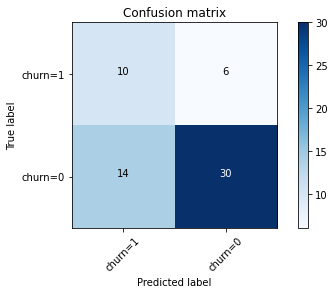

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [22]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        44
           1       0.42      0.62      0.50        16

    accuracy                           0.67        60
   macro avg       0.62      0.65      0.62        60
weighted avg       0.72      0.67      0.68        60



In [23]:
from sklearn.metrics import log_loss
log_loss(y_test,yhat_prob)

0.5983170539832011